# K Means Clustering Algorithm

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=42)

In [4]:
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

In [5]:
y

array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2,

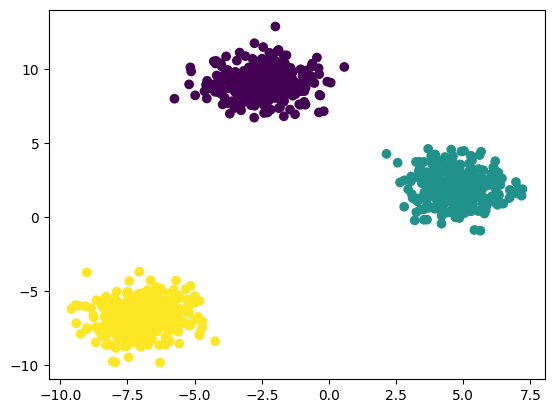

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [9]:
from sklearn.cluster import KMeans

In [10]:
## Elbow Method to select K values
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[46568.383449771434,
 13218.48824537464,
 1402.9560472122448,
 1250.8123811295159,
 1074.6408216442346,
 911.8898616684651,
 880.7147935364331,
 718.717453599075,
 707.2328695041363,
 580.8840050530459]

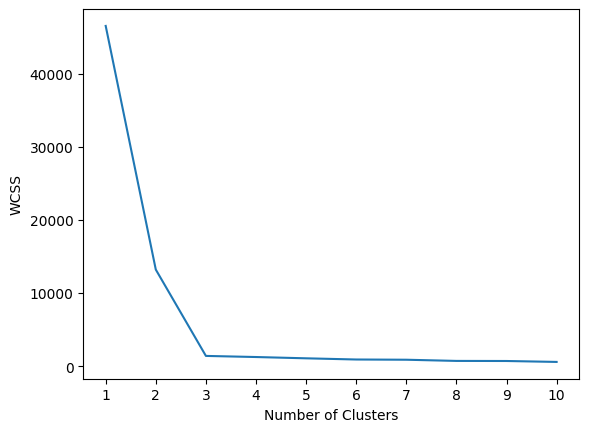

In [12]:
## Plot Elbow Curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

- Therfore as far our Observation from Elbow Plot we found the Number of Cluster to be 3

In [13]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [14]:
y_labels=kmeans.fit_predict(X_train)

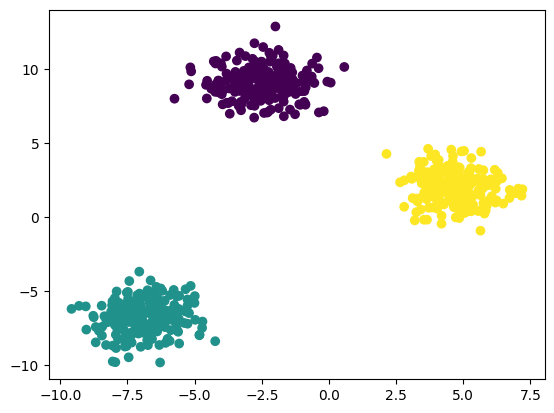

In [15]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [16]:
## Knee Locator
!pip install kneed

In [17]:
from kneed import KneeLocator

In [18]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [19]:
k1.elbow

3

In [20]:
## Silhoutte Scoring
from sklearn.metrics import silhouette_score

In [21]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [22]:
silhouette_coefficients

[0.7034472678400877,
 0.8411019462735057,
 0.6564608790636467,
 0.470056524219497,
 0.3230515429043311,
 0.4818125785629894,
 0.33125802262498266,
 0.329221329045334,
 0.3153921275507634]

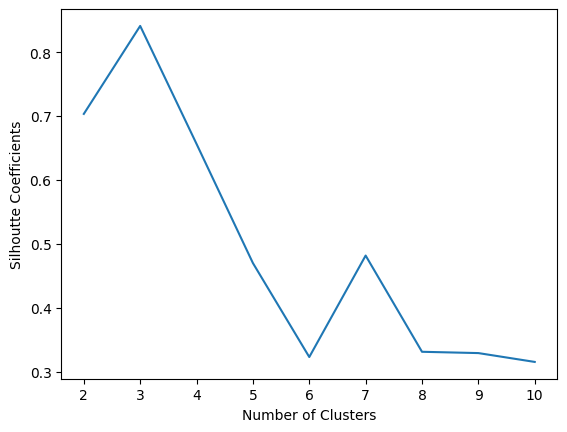

In [23]:
## Plot Silhoutte Scores
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coefficients")
plt.show()